# Feature Extraction

**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('Heart Failure.csv')
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 55)

In [ ]:
acc_scores = []
r2_scores = []
sc = []
for score in range(100, 1000, 50):
    model = RandomForestClassifier(n_estimators = score)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    acc_scores.append(accuracy_score(y_test, prediction))
    r2_scores.append(r2_score(y_test, prediction))
    sc.append(score)

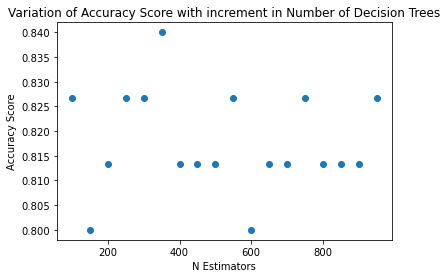

In [ ]:
plt.scatter(sc, acc_scores)
xlabel = plt.xlabel('N Estimators')
ylabel = plt.ylabel('Accuracy Score')
plt.title('Variation of Accuracy Score with increment in Number of Decision Trees')
plt.show()

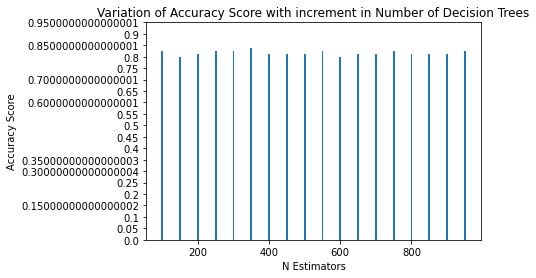

In [ ]:
plt.bar(sc, acc_scores, width = 5, )
xlabel = plt.xlabel('N Estimators')
ylabel = plt.ylabel('Accuracy Score')
plt.yticks(np.arange(0, 1, step = 0.05), np.arange(0, 1, step = 0.05))
plt.title('Variation of Accuracy Score with increment in Number of Decision Trees')
plt.show()


**Principal Component Analysis (PCA)**


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['DEATH_EVENT']], axis = 1)
PCA_df['DEATH_EVENT'] = LabelEncoder().fit_transform(PCA_df['DEATH_EVENT'])
PCA_df.head()

,PC1,PC2,DEATH_EVENT
0,1641.969406,-0.145905,1
1,1.766518,7279.254974,1
2,-101358.133289,-411.138654,1
3,-53358.143086,-457.772091,1
4,63641.865204,-437.190782,1


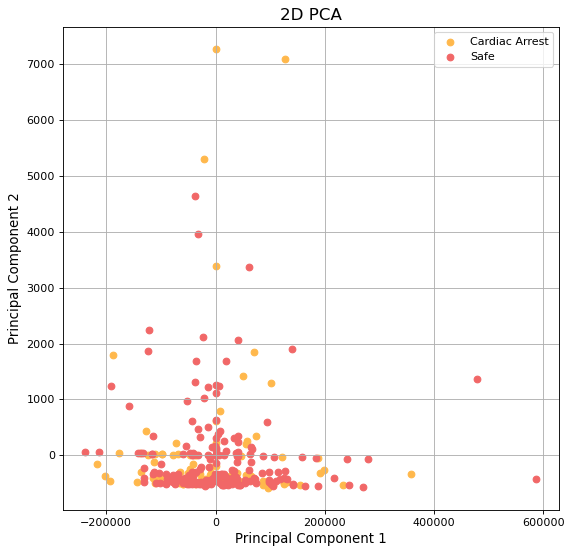

In [ ]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['#FFB84C', '#F16767']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['DEATH_EVENT'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['DEATH_EVENT'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Cardiac Arrest', 'Safe'])
plt.grid()

**Independent Component Analysis (ICA)**


In [ ]:
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_lda = lda.fit(X, y).transform(X)
lda_df = pd.DataFrame(data = X_lda, columns = ['LDA1'])
lda_df = pd.concat([lda_df, df['DEATH_EVENT']], axis = 1)
lda_df['DEATH_EVENT'] = LabelEncoder().fit_transform(lda_df['DEATH_EVENT'])
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])
lda_df.head()

Original number of features: 12
Reduced number of features: 1


,LDA1,DEATH_EVENT
0,-2.863089,1
1,-2.223360,1
2,-2.399034,1
3,-1.973079,1
4,-3.646093,1


In [ ]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print(time.process_time() - start)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

0.0
[[57  5]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        62
           1       0.81      0.75      0.78        28

    accuracy                           0.87        90
   macro avg       0.85      0.83      0.84        90
weighted avg       0.86      0.87      0.87        90



LinearDiscriminantAnalysis()

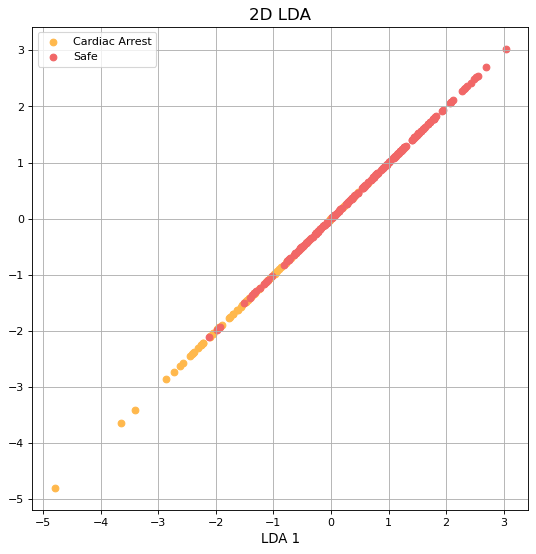

In [ ]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['#FFB84C', '#F16767']
for clas, color in zip(classes, colors):
    plt.scatter(lda_df.loc[lda_df['DEATH_EVENT'] == clas, 'LDA1'], 
                lda_df.loc[lda_df['DEATH_EVENT'] == clas, 'LDA1'], 
                c = color)
    
plt.xlabel('LDA 1', fontsize = 12)
plt.title('2D LDA', fontsize = 15)
plt.legend(['Cardiac Arrest', 'Safe'])
plt.grid()

C:\Users\tahah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


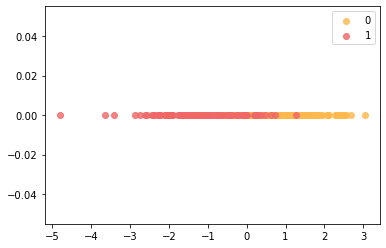

In [ ]:
model = LinearDiscriminantAnalysis(n_components=1)
data_plot = model.fit(X, y).transform(X)
target_names = [0, 1]
y = y.reshape(-1, 1)

#create LDA plot
plt.figure()
colors = ['#FFB84C', '#F16767']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[y.ravel() == i], np.zeros_like(data_plot[y.ravel() == i]), alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()
